# Housing
- Created by Gabriel Wong
- Content:
    - Data Cleaning
        - Target: median_house_value {0, 1, 2} (low, mid, high price)
    - Exploratory Data Analysis
    - Statistical Modeling
        - Performance
            - Cross-validation:     &emsp; &emsp;                                   ROC_AUC (0.950), f1 (0.830), Accuracy (0.830), Precision (0.831), Recall (0.830)
            - Test set:             &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;       ROC_AUC (0.956), f1 (0.844), Accuracy (0.843), Precision (0.845), Recall (0.843) 
        - Top 3 factors
            - ocean_proximity
            - median_income
            - location (lattitude, longitude)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style("white")
warnings.filterwarnings('ignore')

# Import script
import ml

## Data Cleaning
- Sections:
    - Load Data
    - Set Target & Train-Test Split
    - Clean Data

### Load Data

In [3]:
# Load data
fname = '2_housing'
df = pd.read_csv('0Data/'+fname+'.csv')

df.head(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY

### Set Target & Train-Test Split

In [4]:
# Set general parameters
reg_cla = 0     # Regression (1) or Classification (0)
rand_st = 42    # Random state
q = 3           # Quantile cut

# Set target
target = 'median_house_value'
df[target] = pd.to_numeric(pd.qcut(df[target], q, labels=np.arange(0, q)))

In [5]:
# Sample large dataset - Yes (1) or No (0)
sample_y_n = 0
df_ = ml.data_sample(reg_cla, df, target, sample_y_n, rand_st, q, sample_frac=0.1)

# Split dataset into train and test - Yes (1) or No (0)
tset_y_n = 1
X_train, X_test, y_train, y_test, mod_label, y_class = ml.train_test(reg_cla, df_, target, 
                                                                     tset_y_n, rand_st, q, 
                                                                     tset_size=0.1)   
print(X_train.shape, X_test.shape, mod_label, y_class)

(18576, 9) (2064, 9) [0, 1, 2] [0 1 2]


In [6]:
# New data copy
df2 = X_train.copy()
df2[target] = y_train

# Show basic data info. - raw data
data_inf = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (18576, 10)


---------- General Data Info. ----------
                   Unique  Count   Dtypes Null Null %
median_income       11976  18576  float64    0    0.0
total_rooms          5732  18576  float64    0    0.0
population           3749  18576  float64    0    0.0
total_bedrooms       1853  18393  float64  183    1.0
households           1751  18576  float64    0    0.0
latitude              852  18576  float64    0    0.0
longitude             834  18576  float64    0    0.0
housing_median_age     52  18576  float64    0    0.0
ocean_proximity         5  18576   object    0    0.0
median_house_value      3  18576    int64    0    0.0


---------- Nulls ----------
               Unique   Dtypes Null Null %
total_bedrooms   1853  float64  183    1.0


---------- Basic statistics - Object and Number ----------
--- Object ---
                unique  count        top  freq  freq %
ocean_proximity      5  18576  <1H OCEAN  8242   44.37


--- Num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income ocean_proximity  median_house_value
10009    -121.14     39.10                13.0       1085.0           227.0       629.0       214.0         5.0389          INLAND                   1
15001    -117.02     32.74                12.0       3301.0           963.0      2000.0       879.0         1.8594      NEAR OCEAN                   0
11152    -117.97     33.84                25.0       2471.0           518.0      1539.0       500.0         4.2679       <1H OCEAN                   1

### Clean Data

In [7]:
# Column removal, if required
## Remove Nulls
null_threshold = 25     # Any attributes with more than null_threshold will be removed 
null_feat = data_inf['Null %'][data_inf['Null %'] > null_threshold].\
            sort_values(ascending=False).index.values 
df2.drop(null_feat, axis=1, errors='ignore', inplace=True)

# Show basic data info. - cleaned data
_ = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (18576, 10)


---------- General Data Info. ----------
                   Unique  Count   Dtypes Null Null %
median_income       11976  18576  float64    0    0.0
total_rooms          5732  18576  float64    0    0.0
population           3749  18576  float64    0    0.0
total_bedrooms       1853  18393  float64  183    1.0
households           1751  18576  float64    0    0.0
latitude              852  18576  float64    0    0.0
longitude             834  18576  float64    0    0.0
housing_median_age     52  18576  float64    0    0.0
ocean_proximity         5  18576   object    0    0.0
median_house_value      3  18576    int64    0    0.0


---------- Nulls ----------
               Unique   Dtypes Null Null %
total_bedrooms   1853  float64  183    1.0


---------- Basic statistics - Object and Number ----------
--- Object ---
                unique  count        top  freq  freq %
ocean_proximity      5  18576  <1H OCEAN  8242   44.37


--- Num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income ocean_proximity  median_house_value
10009    -121.14     39.10                13.0       1085.0           227.0       629.0       214.0         5.0389          INLAND                   1
15001    -117.02     32.74                12.0       3301.0           963.0      2000.0       879.0         1.8594      NEAR OCEAN                   0
11152    -117.97     33.84                25.0       2471.0           518.0      1539.0       500.0         4.2679       <1H OCEAN                   1

---------- Target distribution - Classification ----------


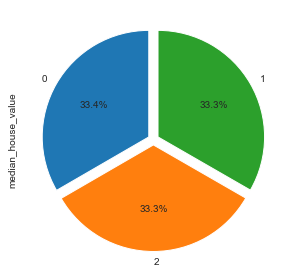

0    0.333549
2    0.333333
1    0.333118
Name: median_house_value, dtype: float64 



In [8]:
# Show target distribution
## Classification
print('-'*10, 'Target distribution - Classification', '-'*10)
df2[target].value_counts().plot.pie(autopct="%.1f%%", 
                                    explode=[0.05] * len(mod_label), 
                                    startangle=90)
plt.tight_layout()
plt.savefig('1Images/0target_distribution.png', dpi=100)
plt.show()
print(df2[target].value_counts(1), '\n')

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Exploratory Data Analysis

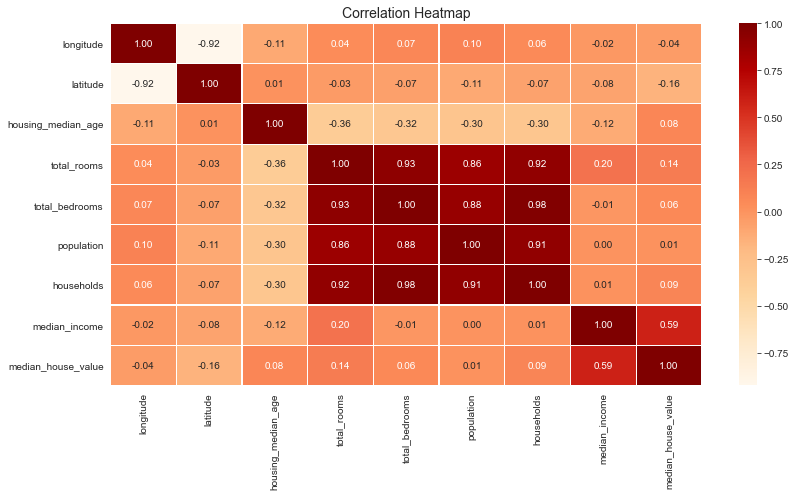

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,7))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df2.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_1.png', dpi=100)

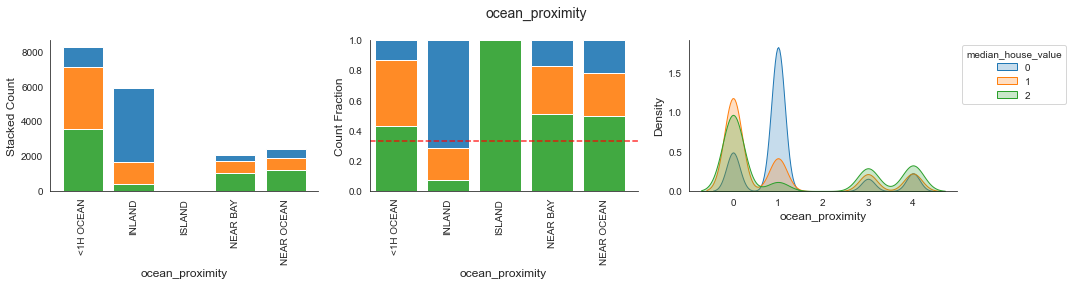

In [11]:
# Plots for categorical attributes
ml.hist_cat(df2, 'ocean_proximity', target, fsize=(15, 4), rotate=True, palette='tab10')
plt.savefig('1Images/1ocean_proximity.png', dpi=100)

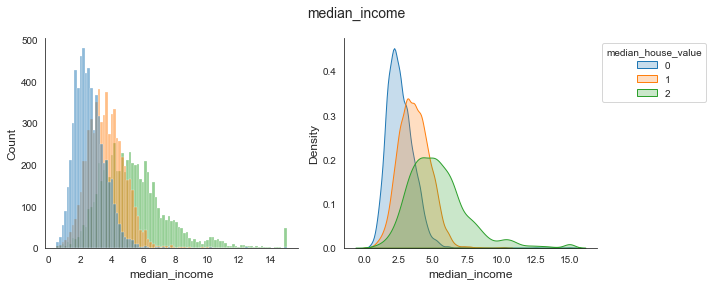

In [12]:
# Plots for numerical attributes
ml.hist_num(df2, 'median_income', target, bandwidth=1, fsize=(10, 4), skew=True, palette='tab10')
plt.savefig('1Images/1median_income.png', dpi=100)

<Figure size 864x504 with 0 Axes>

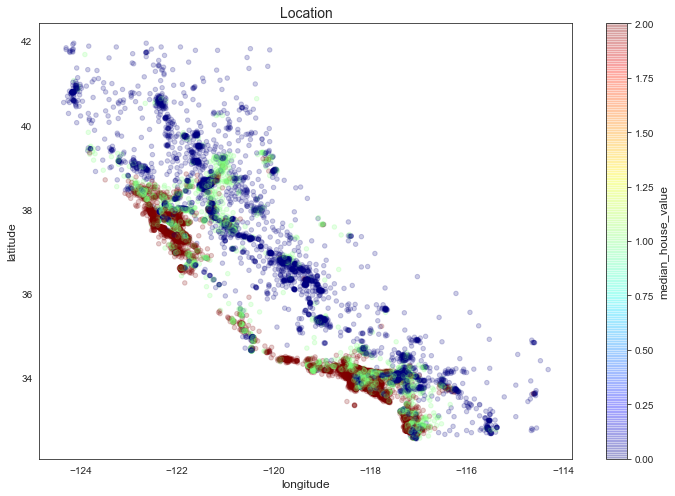

In [13]:
# Matplotlib geoplot
plt.figure(figsize=(12,7))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

df2.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
    c=target, cmap=plt.get_cmap("jet"), figsize=(10,7), sharex=False);

plt.title('Location', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1longitude_latitude.png', dpi=100)    

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Statistical Modeling
- Sections:
    - Part 1: Improve Baseline Performance
        - Feature Engineering
        - Categorize Numerical and Categorical Attributes
        - Preprocess Data, Oversampling, Cross-validation
        - Model Optimization
        - Results
        - Feature Importance    
        - Additional Plots
    - Part 2: Evaluate Test Set
        - Results

### Part 1: Improve Baseline Performance

#### (Part 1) Feature Engineering

In [14]:
# New copy of data
df4 = df2.drop(target, axis=1, errors='ignore').copy()

# Show basic data info.
_ = ml.data_info(df4)
df4.head(3)

---------- Data Shape ----------
Data:	 (18576, 9)


---------- General Data Info. ----------
                   Unique  Count   Dtypes Null Null %
median_income       11976  18576  float64    0    0.0
total_rooms          5732  18576  float64    0    0.0
population           3749  18576  float64    0    0.0
total_bedrooms       1853  18393  float64  183    1.0
households           1751  18576  float64    0    0.0
latitude              852  18576  float64    0    0.0
longitude             834  18576  float64    0    0.0
housing_median_age     52  18576  float64    0    0.0
ocean_proximity         5  18576   object    0    0.0


---------- Nulls ----------
               Unique   Dtypes Null Null %
total_bedrooms   1853  float64  183    1.0


---------- Basic statistics - Object and Number ----------
--- Object ---
                unique  count        top  freq  freq %
ocean_proximity      5  18576  <1H OCEAN  8242   44.37


--- Number ---
                      count     mean      std  

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income ocean_proximity
10009    -121.14     39.10                13.0       1085.0           227.0       629.0       214.0         5.0389          INLAND
15001    -117.02     32.74                12.0       3301.0           963.0      2000.0       879.0         1.8594      NEAR OCEAN
11152    -117.97     33.84                25.0       2471.0           518.0      1539.0       500.0         4.2679       <1H OCEAN

In [15]:
# Execute clean1 - Feature Engineering
clean1_ = ml.clean1()
clean1_.fit(df4, y_train)
df4_ = clean1_.transform(df4)

# Show basic data info.
_, ml.data_info(df4_)
df4_.head(3)

---------- Data Shape ----------
Data:	 (18576, 12)


---------- General Data Info. ----------
                         Unique  Count   Dtypes Null Null %
rooms_per_household       17533  18576  float64    0    0.0
bedrooms_per_room         17421  18393  float64  183    1.0
population_per_household  17065  18576  float64    0    0.0
median_income             11976  18576  float64    0    0.0
total_rooms                5732  18576  float64    0    0.0
population                 3749  18576  float64    0    0.0
total_bedrooms             1853  18393  float64  183    1.0
households                 1751  18576  float64    0    0.0
latitude                    852  18576  float64    0    0.0
longitude                   834  18576  float64    0    0.0
housing_median_age           52  18576  float64    0    0.0
ocean_proximity               5  18576    int64    0    0.0


---------- Nulls ----------
                  Unique   Dtypes Null Null %
bedrooms_per_room  17421  float64  183    1.0
tot

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  ocean_proximity  rooms_per_household  bedrooms_per_room  population_per_household
10009    -121.14     39.10                13.0       1085.0           227.0       629.0       214.0         5.0389                2             5.070093           0.209217                  2.939252
15001    -117.02     32.74                12.0       3301.0           963.0      2000.0       879.0         1.8594                5             3.755404           0.291730                  2.275313
11152    -117.97     33.84                25.0       2471.0           518.0      1539.0       500.0         4.2679                1             4.942000           0.209632                  3.078000

#### (Part 1) Categorize Numerical and Categorical Attributes

In [16]:
# Categorize attributes into numerical, categorical, and trim buckets
num_feat, cat_feat = ml.num_cat_split(df4_, num_to_cat_uniq=1, trim_uniq_cat=35)  

Extra trim       :  []
Num_feat         :  ['housing_median_age' 'households' 'median_income' 'ocean_proximity'
 'population_per_household' 'total_bedrooms' 'total_rooms'
 'rooms_per_household' 'latitude' 'longitude' 'population'
 'bedrooms_per_room']
Cat_feat         :  []


#### (Part 1) Preprocess Data, Load Models, Sampling, Cross-Validation

In [17]:
# Preprocess training data
preprocessor_ = ml.pipeline(reg_cla, 'median', num_feat, cat_feat, rand_st)
X_train2 = preprocessor_.fit_transform(df4_)
y_train2 = y_train.copy()
print(X_train2.shape)

(18576, 12)


In [18]:
# Load models 
model = ml.models(reg_cla, rand_st)

# Oversampling
if reg_cla:
    X_train3, y_train3 = (X_train2, y_train2.copy()) 
else:
    X_train3, y_train3 = ml.oversample_random(X_train2, y_train2, rand_st, strategy='auto')
print(X_train3.shape)  

# Scoring metrics   # ***
## Metrics for regression and classification
roc_metric = 'roc_auc_ovo' if len(mod_label) > 2 else 'roc_auc'     # multi-class and binary-class
reg_score = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cla_score = [roc_metric, 'f1_macro', 'balanced_accuracy', 'precision_macro', 'recall_macro']

## Name for table reporting
reg_score_name = ['rmse', 'mae', 'r2']
cla_score_name = ['roc_auc', 'f1', 'balanced_accuracy', 'precision', 'recall']

type_ = reg_score if reg_cla else cla_score
type_2 = reg_score_name if reg_cla else cla_score_name

str_add = ['test_']
score_type = [u + k for u in str_add for k in type_]

(18588, 12)


#### (Part 1) Model Optimization

In [20]:
# Optimize model - RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from scipy.stats import reciprocal, randint 

start = time.time()
param_distribs = {'n_estimators': randint(low=100, high=500),       
                  'max_depth': randint(low=3, high=7),
                  'min_child_weight': randint(low=1, high=4),
                  'learning_rate': reciprocal(0.13, 0.3),
                 }

rnd_search = RandomizedSearchCV(model['XGBC'], param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring=type_, n_jobs=-1,
                                random_state=rand_st, refit=type_[0])
rnd_search.fit(X_train3, y_train3)
end = time.time() - start
print('Time taken:', end,'\n')

rnd_search.best_score_, rnd_search.best_params_

Time taken: 698.91623711586 



(0.9496539646603086,
 {'learning_rate': 0.13517341627841897,
  'max_depth': 6,
  'min_child_weight': 3,
  'n_estimators': 289})

#### (Part 1) Results

In [21]:
# Cross validation - optimized model
import time 
from sklearn.model_selection import cross_validate  

start = time.time()
scores4 = cross_validate(rnd_search.best_estimator_, X_train3, y_train3, 
                         scoring=type_, cv=10, n_jobs=-1)   
end = time.time() - start
print('Time taken:', round(end, 2), 's\n')

## Display scores
scores_data = pd.read_csv('2Results/scores_tbl.csv', index_col=0)   
scores4_ = pd.DataFrame.from_dict(scores4)
scores_data['XGBC-opt-2'] = np.round(scores4_.mean()[2:].values, 3)
scores_data.to_csv('2Results/scores_tbl2.csv')
scores_data      

Time taken: 88.19 s



LogC   XGBC  XGBC-opt  XGBC-opt-2
roc_auc            0.884  0.945     0.947       0.950
f1                 0.726  0.822     0.828       0.830
balanced_accuracy  0.727  0.821     0.828       0.830
precision          0.725  0.823     0.829       0.831
recall             0.727  0.821     0.828       0.830

In [142]:
# --- Extra Spacing ---

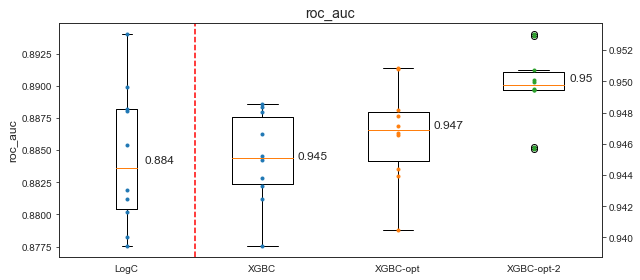

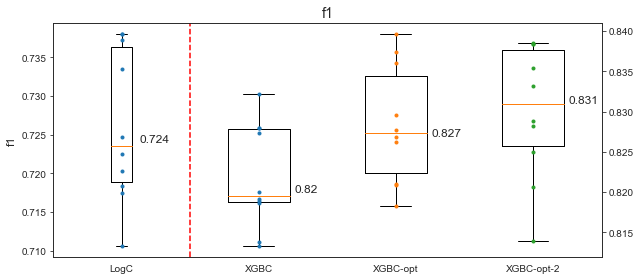

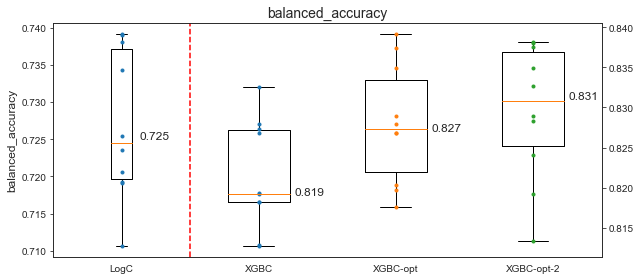

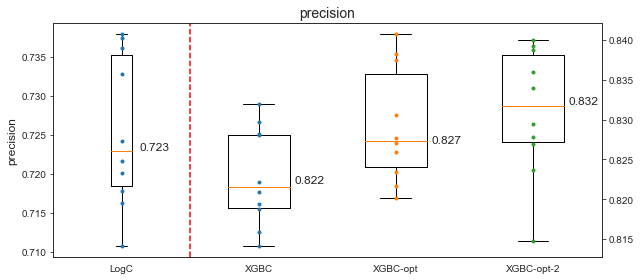

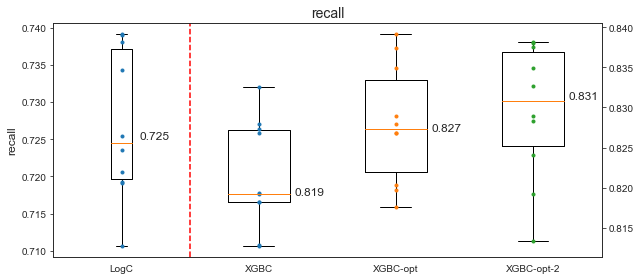

In [25]:
# Load previous scores      
scores1 = pd.read_csv('2Results/scores1.csv')
scores2 = pd.read_csv('2Results/scores2.csv')
scores3 = pd.read_csv('2Results/scores3.csv')

# Boxplots for cross validation results
for i in range(len(score_type)):
    ml.box_result(name=type_2[i], 
                  scores=np.c_[scores1[score_type[i]], scores2[score_type[i]], \
                               scores3[score_type[i]], scores4[score_type[i]]], \
                  labels=scores_data.columns, 
                  fsize=(9, 4), cv=10, x_offset=0.28, twinx=True)
    plt.savefig('1Images/2'+ type_2[i] +'.png', dpi=100)               

In [23]:
# Model fit
clf_ = rnd_search.best_estimator_
clf_.fit(X_train3, y_train3)
X_train3.shape

(18588, 12)

#### (Part 1) Feature Importance

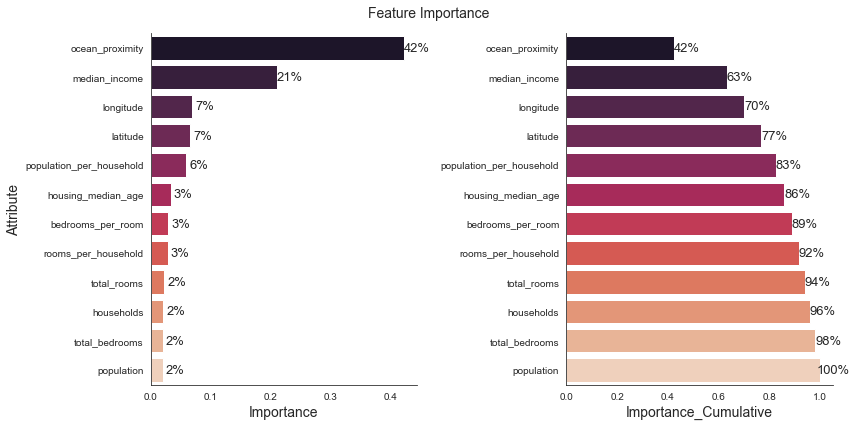

In [36]:
# Feature Importance
ml.feat_imp(num_feat, cat_feat, preprocessor_, clf_, fsize=(12, 6), 
            top=X_train3.shape[1], x1_adj=0.021, x2_adj=0.051, palette='rocket')
plt.savefig('1Images/3Feature_Importance.png', dpi=100)

#### (Part 1) Additional Plots

In [27]:
# Data for plotting
df5 = df4_.copy()
df5[target] = y_train.copy()

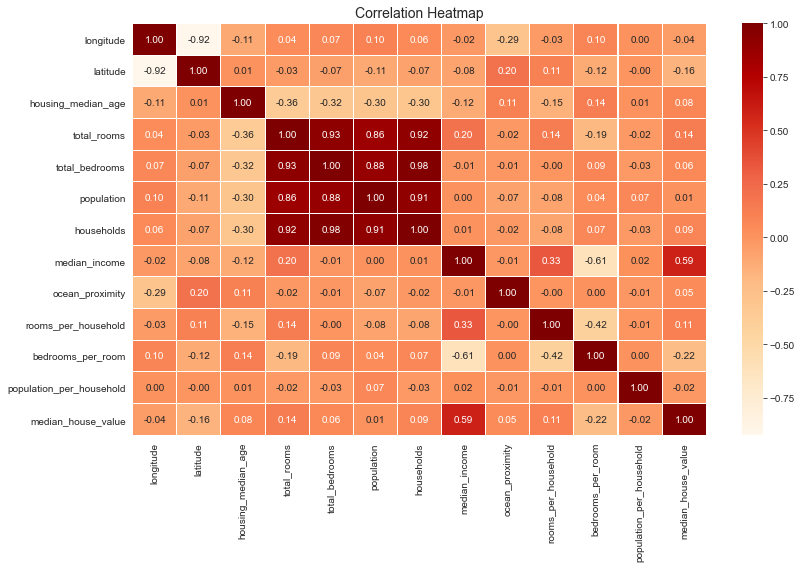

In [28]:
# Correlation heatmap
plt.figure(figsize=(12,8))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df5.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_2.png', dpi=100)

In [130]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

### Part 2: Evaluate Test Set

#### (Part 2) Results

In [29]:
''' Improved Optimized Model '''
# New copy of data
df_test = X_test.copy()

# Execute clean1 on Test
df_test = clean1_.transform(df_test)

# Preprocess test data
X_test2 = preprocessor_.transform(df_test)
y_test2 = y_test.copy()
print(X_test2.shape)

(2064, 12)


------ Scores ------
                    LogC   XGBC  XGBC-opt  XGBC-opt-2  Test_set
roc_auc            0.884  0.945     0.947       0.950     0.956
f1                 0.726  0.822     0.828       0.830     0.844
balanced_accuracy  0.727  0.821     0.828       0.830     0.843
precision          0.725  0.823     0.829       0.831     0.845
recall             0.727  0.821     0.828       0.830     0.843 

------ Classification Report ------
              precision  recall  f1-score   support
0                 0.884   0.895     0.890   688.000
1                 0.761   0.789     0.775   688.000
2                 0.890   0.844     0.867   688.000
accuracy          0.843   0.843     0.843     0.843
macro avg         0.845   0.843     0.844  2064.000
weighted avg      0.845   0.843     0.844  2064.000 




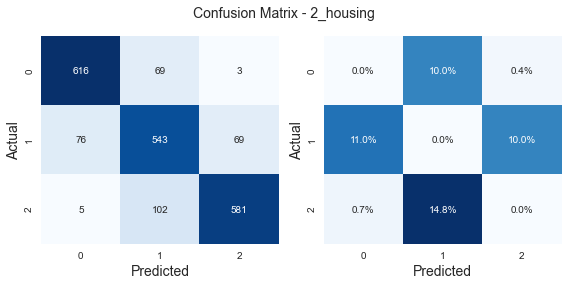

In [30]:
# Predict test - Improved optimized model
y_test_pred = clf_.predict(X_test2)
y_test_pred_proba = 0 if reg_cla else clf_.predict_proba(X_test2)

# Classification
if not reg_cla:
    # Test scores
    test_scores = ml.test_metric(reg_cla, y_test2, y_test_pred, y_test_pred_proba, mod_label)
    scores_data['Test_set'] = test_scores
    scores_data.to_csv('2Results/scores_tbl2.csv')
    print('------ Scores ------') 
    print (scores_data, '\n')

    # Confusion Matrix
    ml.conf_matrix(fname, y_test2, y_test_pred, y_class, fsize=(8, 4), cmap='Blues')
    plt.savefig('1Images/3Confusion_Matrix_Test.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---